# Credit Card Fraud detection

The aim of this project is to predict fraudulent credit card transactions using differetn machine learning models.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

In [87]:
#pip install tensorflow

In [88]:
#pip install keras

In [89]:
#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

# EDA

In [90]:
#load the data
credit= pd.read_csv("creditcard.csv")
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [91]:
credit.shape

(284807, 31)

In [92]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [93]:
#check if the data has hull values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null value spotted 

### distribution of transaction clases 

In [107]:
classes = credit['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [110]:
genuine_share = round((classes[0]/credit['Class'].count()*100),2)
genuine_share

99.83

In [111]:
fraud_share = round((classes[1]/credit['Class'].count()*100),2)
fraud_share

0.17

 only 0.17% of total transacions are fraudulant.

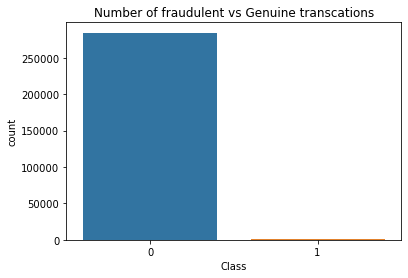

In [113]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=credit)
plt.title('Number of fraudulent vs Genuine transcations')
plt.show()

O represents genuine transactions and 1 represents fradulant transactions

Bar plot for the percentage of fraudulent vs non-fraudulent transcations

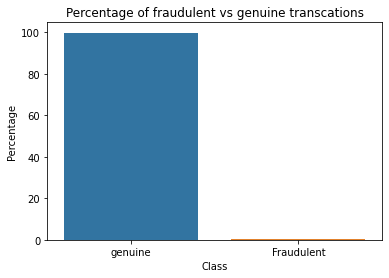

In [114]:
fraud_percentage = {'Class':['genuine', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs genuine transcations')
plt.show()

We can clearly see how imbalance the data is. Only tiny portion of the total credit card transactions are fradulant.

### relationship between classes with time

In [115]:
# Creating fraudulent dataframe
fraud = credit[credit['Class'] == 1]

# Creating genuine dataframe
genuine = credit[credit['Class'] == 0]

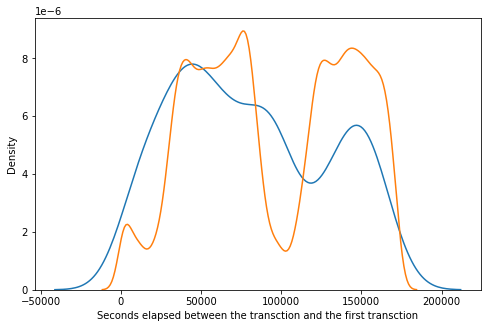

In [116]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(genuine['Time'],label='geunine',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

There is no specific relatonship between time and transaction activities. Hence, time will be dropped.

In [118]:
# Dropping the Time column
credit.drop('Time', axis=1, inplace=True)

### relation between distribution of classes with amount

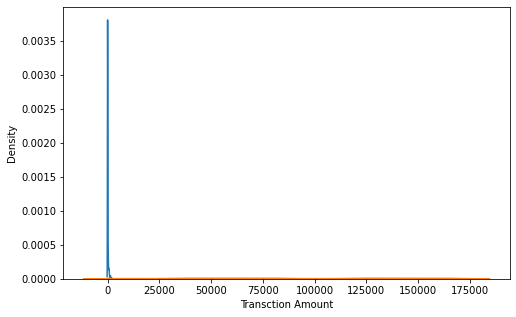

In [120]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(genuine['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Analysis:
    most of the fradulant transactions consists of lower amount.

## Test- Train split 

In [54]:
from sklearn.model_selection import train_test_split

In [121]:
# Putting feature variables into X
X = credit.drop(['Class'], axis=1)

In [122]:
# Putting target variable to y
y = credit['Class']

In [123]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [124]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [125]:
# Instantiate the Scaler
scaler = StandardScaler()

In [126]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [127]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [128]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking skewness

In [130]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

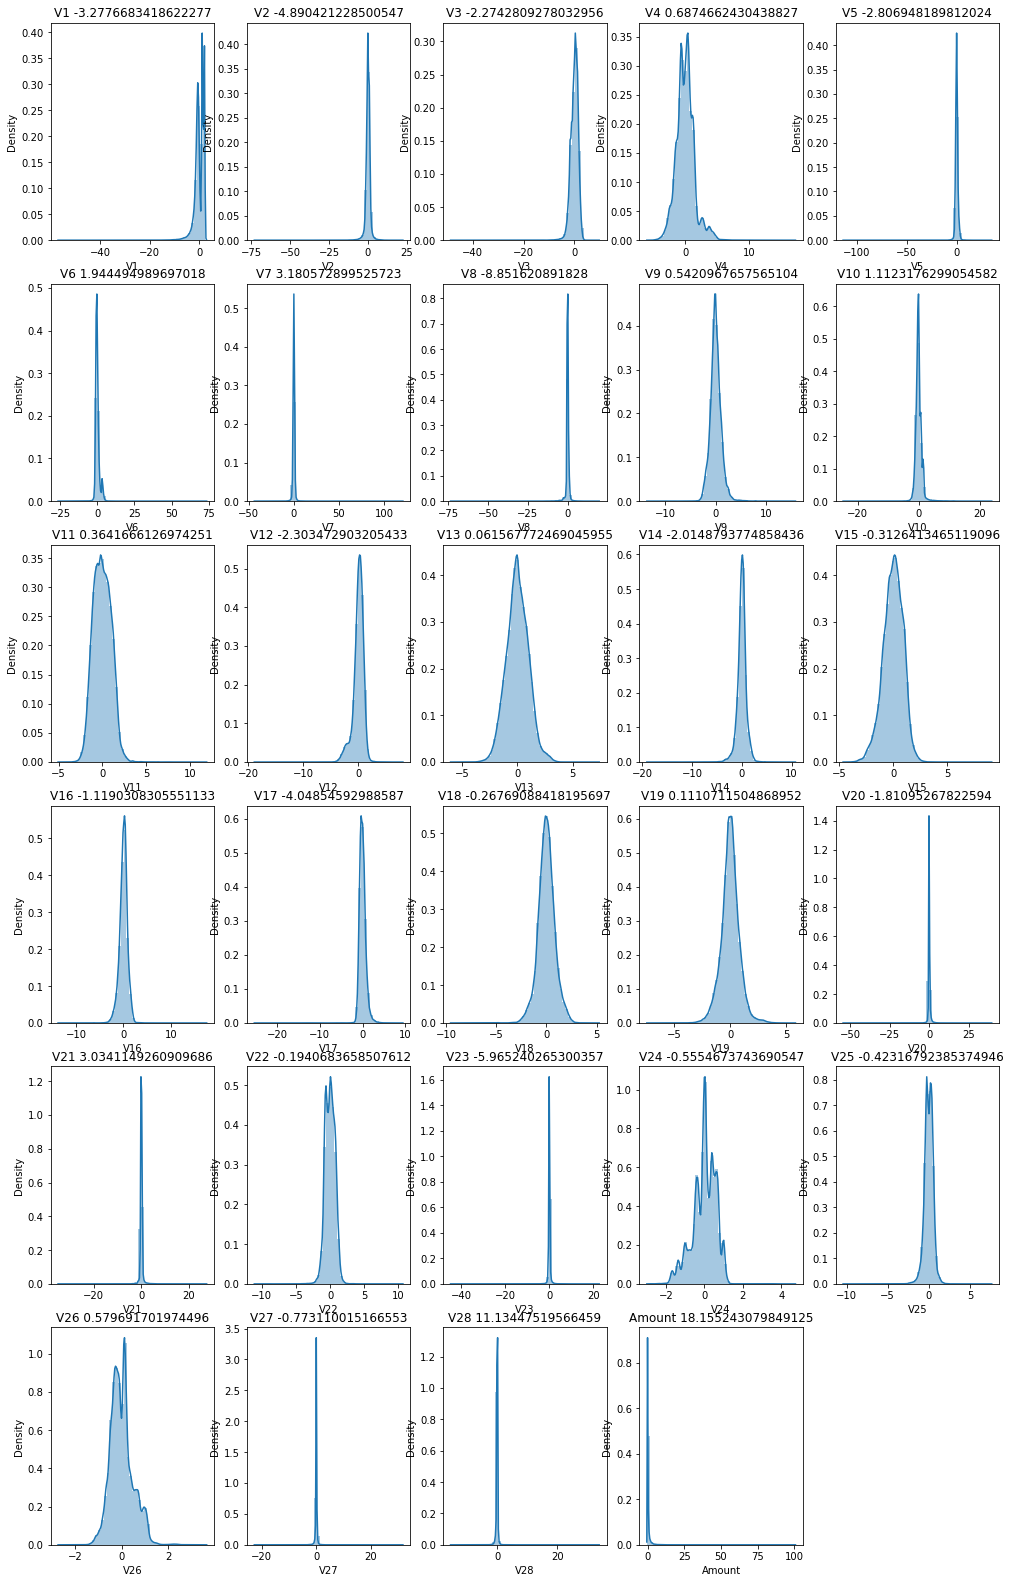

In [131]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

### Mitigate skweness with PowerTransformer

In [132]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [133]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

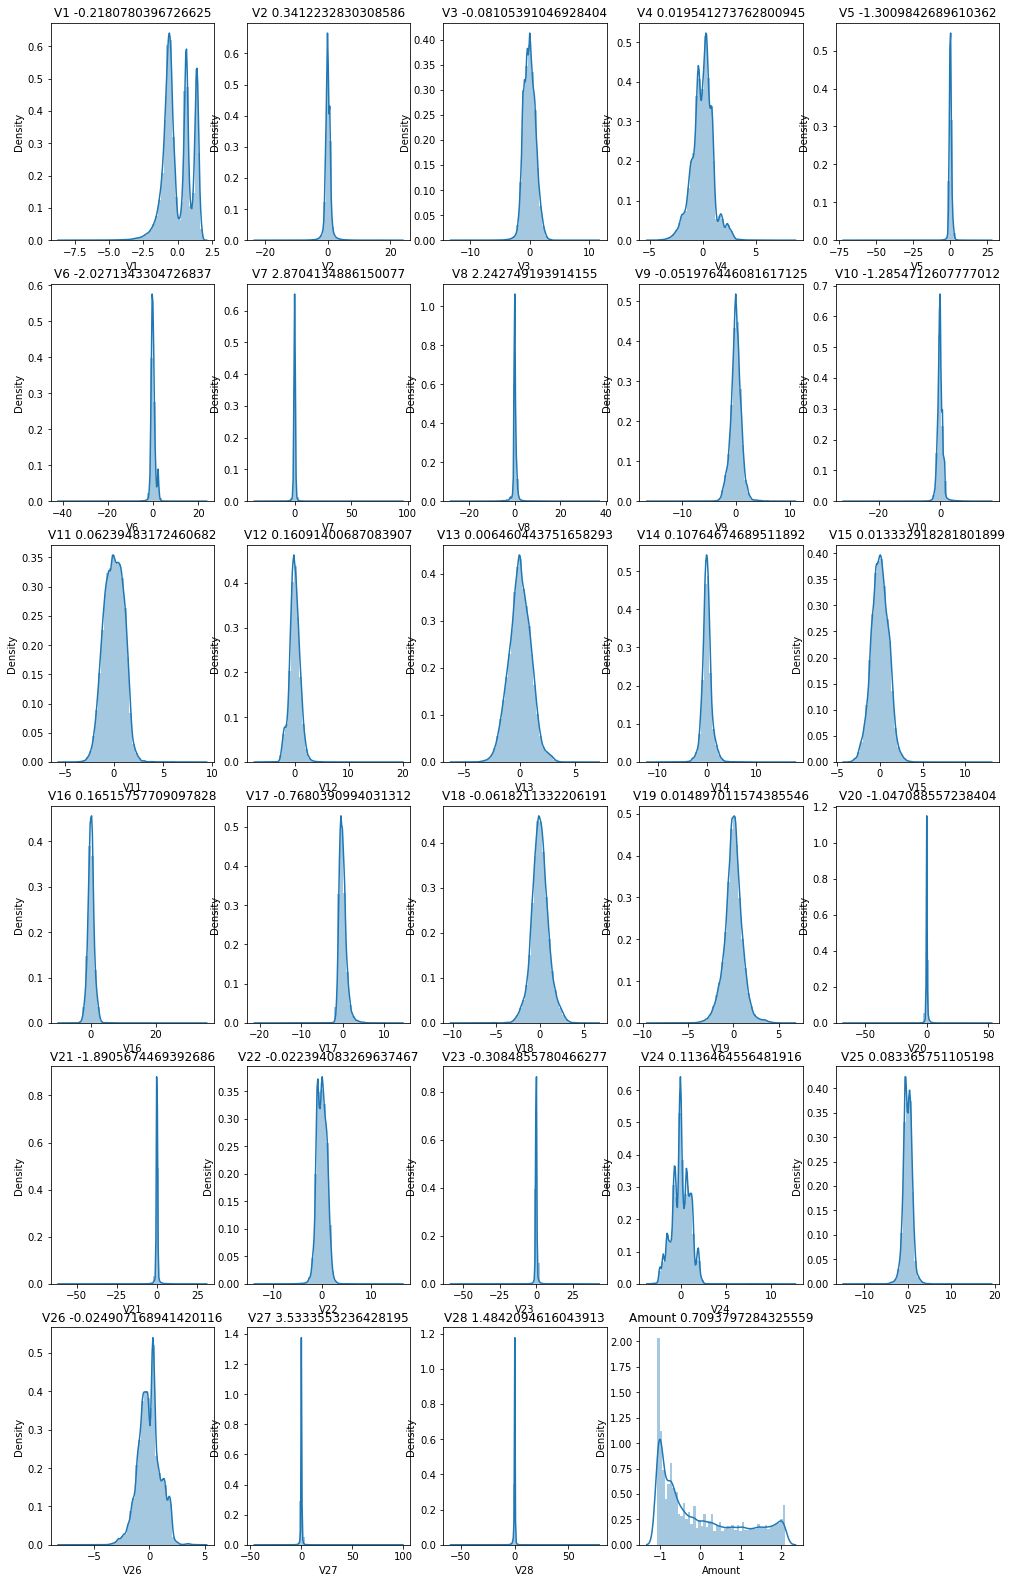

In [134]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

## Handeling data imbalance

Previously I noticed that there's a high data imbalance where only abut 0.17% of the data consists of fradulant transactions. Therefore, I will be using some techniques to balance the data set.

# Undersampling Method

The number of the genuine transctions count will be reduced to 396 to equalize with the fradulant transactions. 

In [165]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [166]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [168]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Building models on Undersampling data set 

# 1. Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [171]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [172]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006582,0.001197,0.002593,4.889087e-04,0.01,{'C': 0.01},0.981717,0.989712,0.979487,0.978515,...,0.982856,0.004061,1,0.988896,0.988040,0.989412,0.988745,0.987835,0.988585,0.000577
1,0.006382,0.000489,0.002194,3.990174e-04,0.1,{'C': 0.1},0.980604,0.988446,0.979647,0.978996,...,0.982606,0.003670,2,0.990723,0.990766,0.992019,0.991342,0.989975,0.990965,0.000683
2,0.006582,0.003314,0.001995,1.092493e-03,1,{'C': 1},0.980604,0.989079,0.972917,0.974507,...,0.980392,0.006098,3,0.991562,0.992273,0.993084,0.992616,0.991210,0.992149,0.000683
3,0.015112,0.006256,0.001795,9.771553e-04,10,{'C': 10},0.979014,0.989237,0.970833,0.972583,...,0.979336,0.007046,4,0.992341,0.992882,0.993621,0.993103,0.991797,0.992749,0.000629
4,0.012367,0.002720,0.001995,2.431402e-07,100,{'C': 100},0.977266,0.989395,0.970192,0.971781,...,0.978697,0.007410,5,0.992331,0.992852,0.993611,0.993143,0.991817,0.992751,0.000625
5,0.013636,0.001460,0.001197,9.771942e-04,1000,{'C': 1000},0.976789,0.989237,0.970192,0.971781,...,0.978570,0.007385,6,0.992281,0.992812,0.993671,0.993233,0.991946,0.992789,0.000623


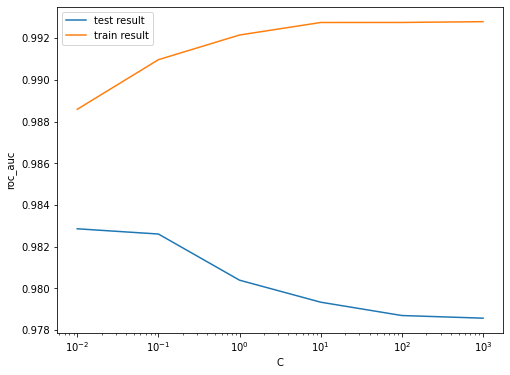

In [173]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [174]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9828564726586035 at C = 0.01


### Logistic regression with optimal C

In [175]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [176]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

In [177]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [178]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 30 366]]


In [179]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [180]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9570707070707071
Sensitivity:- 0.9242424242424242
Specificity:- 0.98989898989899
F1-Score:- 0.9556135770234986


In [181]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       396
           1       0.99      0.92      0.96       396

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



In [182]:

# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [183]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9904027650239772

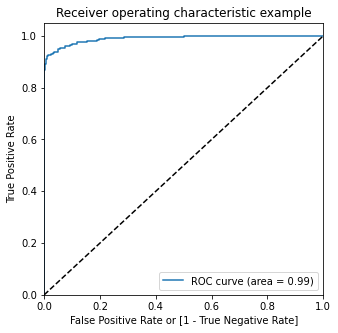

In [184]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

### Prediction on the test set

In [185]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)


In [186]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55578  1288]
 [   12    84]]


In [187]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [188]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9771777676345634
Sensitivity:- 0.875
Specificity:- 0.9773502620194844


In [189]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [190]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [193]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9644002274352572

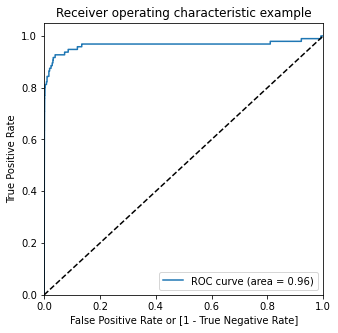

In [195]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary

# 2. XGBoost

In [196]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)  

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[18:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:16:05]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [197]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.130891,0.003665,0.005319,4.705838e-04,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.978134,0.973657,0.978134,0.976641,0.002110,4,0.999928,1.0,1.0,0.999976,0.000034
1,0.143284,0.004485,0.004986,1.123916e-07,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.979970,0.975838,0.978593,0.978134,0.001718,2,1.000000,1.0,1.0,1.000000,0.000000
2,0.136624,0.003585,0.006988,6.675219e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977330,0.975149,0.981749,0.978076,0.002746,3,1.000000,1.0,1.0,1.000000,0.000000
3,0.116778,0.007653,0.008531,5.013171e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.974920,0.971706,0.977388,0.974671,0.002326,6,1.000000,1.0,1.0,1.000000,0.000000
4,0.115152,0.010988,0.006869,6.514924e-03,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.980200,0.971935,0.977101,0.976412,0.003409,5,1.000000,1.0,1.0,1.000000,0.000000
5,0.130105,0.007595,0.003657,2.617707e-03,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.979167,0.970730,0.985135,0.978344,0.005910,1,1.000000,1.0,1.0,1.000000,0.000000


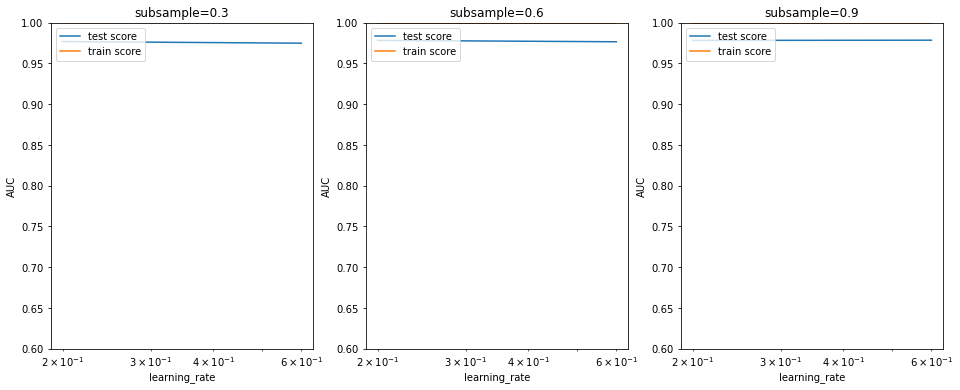

In [198]:
#plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters

the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [199]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [200]:
# chosen hyperparameters
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

[18:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Prediction on the train set

In [201]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [202]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [203]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [204]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [205]:

# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [206]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [207]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

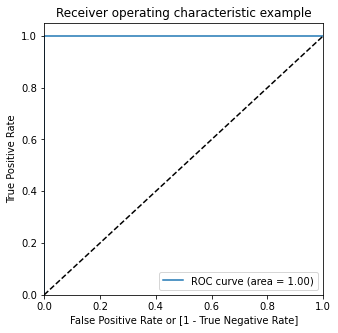

In [208]:

# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [209]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55578  1288]
 [   12    84]]


In [210]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9771777676345634
Sensitivity:- 0.875
Specificity:- 0.9773502620194844


In [212]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [213]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [214]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9776866705647194

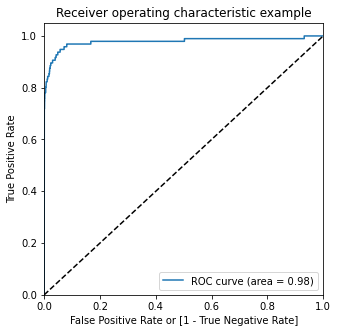

In [215]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary

# 3. Random forest

In [216]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [217]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9763289460259157 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [218]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [219]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

### Prediction on the train set

In [220]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [221]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   4]
 [ 45 351]]


In [222]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [223]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9381313131313131
Sensitivity:- 0.8863636363636364
Specificity:- 0.98989898989899
F1-Score:- 0.9347536617842878


In [224]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.93       396

    accuracy                           0.94       792
   macro avg       0.94      0.94      0.94       792
weighted avg       0.94      0.94      0.94       792



In [225]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]


In [226]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9847910927456383

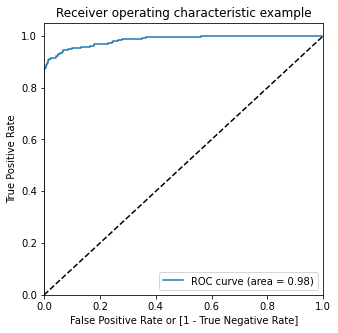

In [227]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

### Prediction on the test set

In [228]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [229]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56192   674]
 [   18    78]]


In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9878515501562445
Sensitivity:- 0.8125
Specificity:- 0.9881475750008792


In [232]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.10      0.81      0.18        96

    accuracy                           0.99     56962
   macro avg       0.55      0.90      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [233]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [234]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9728977259405152

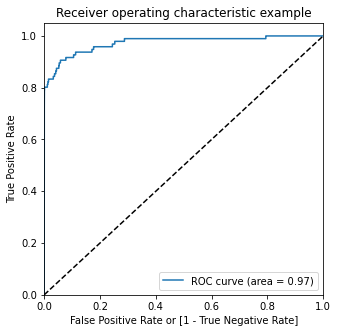

In [235]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary

# Oversampling Method

Here we will make the same count of genuine transctions as fraudulent transctions.

In [237]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [238]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [239]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


# 1. Logistic regression 

In [240]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [241]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.999786,0.059837,0.026755,0.006032,0.01,{'C': 0.01},0.988590,0.988762,0.988399,0.988376,...,0.988591,0.000183,6,0.988573,0.988583,0.988605,0.988693,0.988586,0.988608,0.000044
1,1.043233,0.036350,0.029322,0.001018,0.1,{'C': 0.1},0.988583,0.988793,0.988407,0.988366,...,0.988598,0.000194,5,0.988585,0.988595,0.988611,0.988701,0.988594,0.988617,0.000043
2,1.009675,0.046695,0.026263,0.005321,1,{'C': 1},0.988579,0.988798,0.988407,0.988363,...,0.988599,0.000196,4,0.988585,0.988595,0.988612,0.988701,0.988594,0.988617,0.000043
3,1.019135,0.046851,0.030105,0.001579,10,{'C': 10},0.988578,0.988799,0.988407,0.988364,...,0.988599,0.000197,2,0.988585,0.988595,0.988612,0.988701,0.988593,0.988617,0.000043
4,0.996553,0.085267,0.030322,0.002190,100,{'C': 100},0.988578,0.988799,0.988407,0.988363,...,0.988599,0.000197,1,0.988585,0.988596,0.988612,0.988701,0.988593,0.988617,0.000043
5,0.929264,0.036698,0.024458,0.007282,1000,{'C': 1000},0.988578,0.988799,0.988407,0.988363,...,0.988599,0.000197,3,0.988585,0.988596,0.988612,0.988701,0.988593,0.988617,0.000043


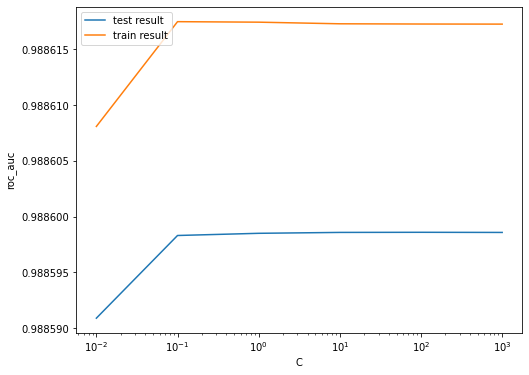

In [242]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [243]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885985986513776 at C = 100


## Logistic regression with optimal C

In [244]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [245]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

### Prediction on the train set

In [246]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [247]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222279   5170]
 [ 17033 210416]]


In [248]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [249]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9511912560617984
Sensitivity:- 0.9251128824483731
Specificity:- 0.9772696296752239
F1-Score:- 0.9498843206518672


In [250]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.93      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [251]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [252]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9886146377351909

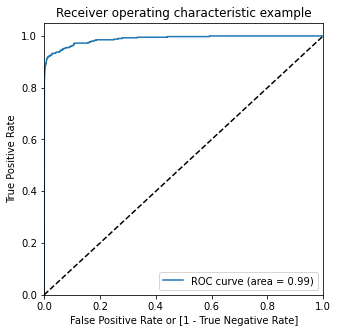

In [253]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the test set

In [254]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [255]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55538  1328]
 [   11    85]]


In [256]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [257]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9764931006636003
Sensitivity:- 0.8854166666666666
Specificity:- 0.9766468540076672


In [258]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [259]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [260]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9713035176262323

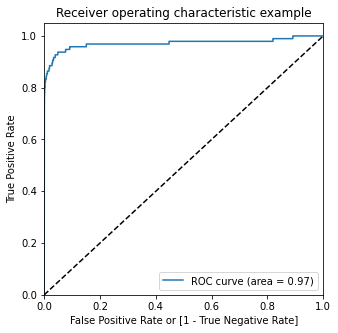

In [261]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary

# 2. XGBoost

In [262]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)   

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[18:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:40]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [263]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.019113,0.485106,0.108022,1.896761e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999907,0.999926,0.999913,0.999915,0.000008,4,0.999924,0.999929,0.999934,0.999929,0.000004
1,22.153843,0.660332,0.107564,2.494237e-02,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999892,0.999933,0.999905,0.999910,0.000017,5,0.999911,0.999938,0.999923,0.999924,0.000011
2,25.214478,0.246006,0.103460,9.266861e-03,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999899,0.999922,0.999907,0.999910,0.000009,6,0.999917,0.999934,0.999926,0.999925,0.000007
3,16.244484,0.500322,0.099052,3.774291e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999990,0.999985,0.999977,0.999984,0.000005,3,0.999995,0.999995,1.000000,0.999997,0.000002
4,21.591988,0.141068,0.101381,1.082354e-02,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999994,0.999996,0.999982,0.999991,0.000006,1,0.999997,1.000000,0.999998,0.999998,0.000001
5,21.693380,0.224390,0.093728,5.840039e-07,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",1.000000,0.999989,0.999974,0.999987,0.000011,2,1.000000,0.999996,1.000000,0.999999,0.000002


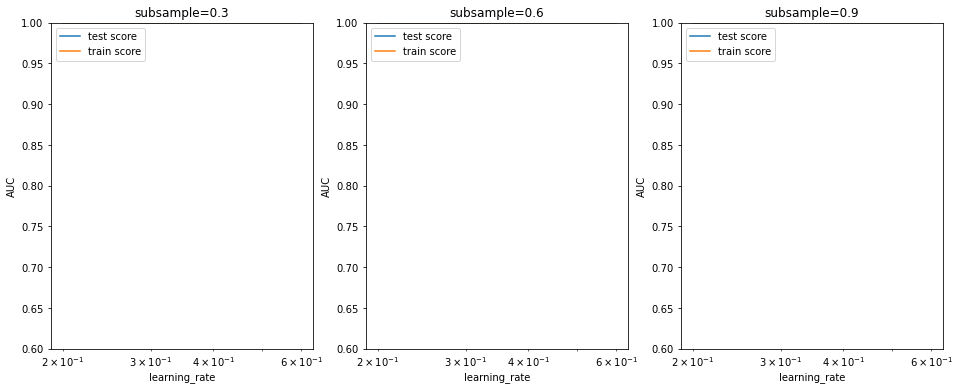

In [264]:
#plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [265]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [266]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

[19:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Prediction on the train set

In [267]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [268]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [269]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [270]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [271]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [272]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [273]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

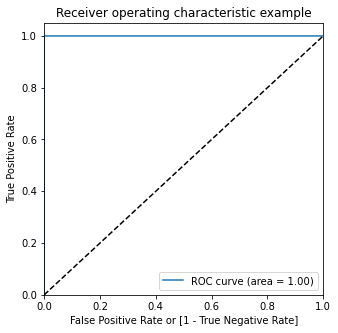

In [274]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the test set

In [275]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [282]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56856    10]
 [   19    77]]


In [283]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [284]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9994908886626171
Sensitivity:- 0.8020833333333334
Specificity:- 0.9998241479970457


In [285]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.89      0.80      0.84        96

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [286]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [287]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9727533807547567

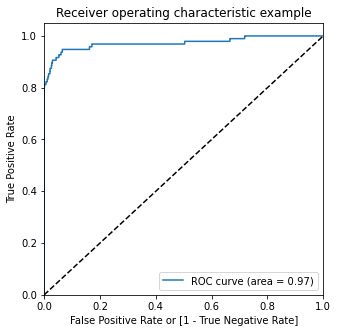

In [288]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary

# 3. Decision Tree

In [292]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [293]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [294]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.048297,0.040781,0.053968,0.005205,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991146,0.984510,0.983932,0.986529,0.003273,6
1,4.138405,0.062823,0.050539,0.002607,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.991146,0.984513,0.983932,0.986530,0.003273,5
2,4.116437,0.034900,0.053533,0.000477,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991136,0.984443,0.983786,0.986455,0.003321,8
3,4.122307,0.093480,0.056929,0.002859,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.991136,0.984443,0.983797,0.986459,0.003318,7
4,6.424519,0.043583,0.050306,0.007390,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999591,0.999636,0.999579,0.999602,0.000025,3
5,6.371496,0.064672,0.051869,0.003564,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999575,0.999627,0.999594,0.999599,0.000021,4
6,6.316975,0.133303,0.052630,0.002688,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999680,0.999671,0.999480,0.999610,0.000092,1
7,6.460852,0.054845,0.055860,0.001617,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999672,0.999624,0.999517,0.999604,0.000065,2


In [295]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996102629731936
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [296]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

### Prediction on the train set

In [297]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [298]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225182   2267]
 [     0 227449]]


In [299]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [300]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.995016465229568
Sensitivity:- 1.0
Specificity:- 0.9900329304591359


In [301]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [302]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [303]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997351634760497

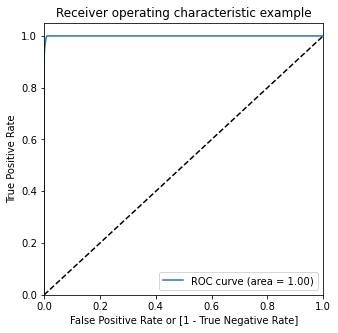

In [304]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

### Prediction on the test set

In [305]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [306]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56257   609]
 [   21    75]]


In [307]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [308]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9889399950844423
Sensitivity:- 0.78125
Specificity:- 0.9892906130200823


In [309]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.78      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.89      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [310]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [311]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8892879752400379

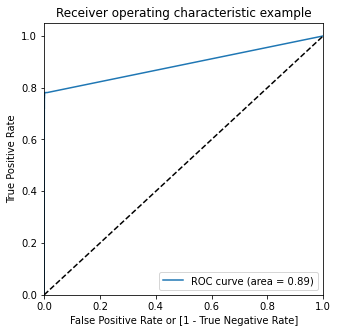

In [312]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary

# SMOTE technique

SMOTE (Synthetic minority oversampling technique) is also an oversampling technique which uses nearest neighbor algorithm to create synthetic data.

In [313]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [315]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [316]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


# 1. Logistic Regression

In [317]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [318]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.913056,0.025296,0.032414,0.001851,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,...,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,0.964647,0.079140,0.033544,0.001860,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,...,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,0.921025,0.022032,0.029051,0.005319,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,0.963937,0.029148,0.030648,0.000606,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,0.911041,0.046715,0.032041,0.000779,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,0.873132,0.051038,0.027590,0.006013,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,...,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


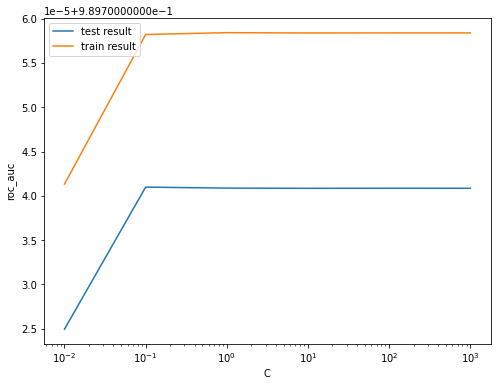

In [319]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [320]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


### Logistic regression with optimal C

In [321]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [322]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

### Prediction on the train set

In [323]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [324]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [325]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [326]:

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [327]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [328]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

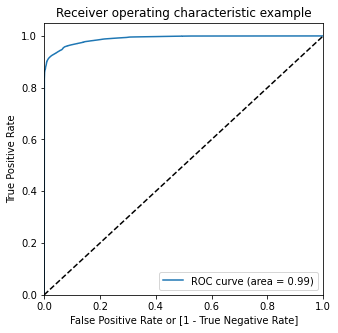

In [329]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

### Prediction on the test set

In [330]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [331]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [332]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [333]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [335]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



### ROC on the test set

In [337]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

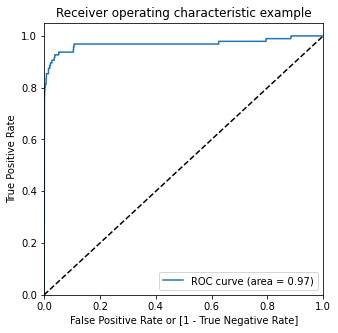

In [338]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary



# 2. XGBoost 

In [339]:
#hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[19:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:53:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:11]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [340]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.881953,0.193195,0.101428,0.010470,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999645,0.999753,0.999685,0.999694,0.000045,4,0.999718,0.999736,0.999720,0.999725,0.000008
1,29.988444,0.393133,0.106102,0.001631,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999671,0.999738,0.999652,0.999687,0.000037,5,0.999733,0.999731,0.999697,0.999721,0.000017
2,36.145200,0.401396,0.118088,0.011572,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999735,0.999648,0.999683,0.000038,6,0.999720,0.999723,0.999720,0.999721,0.000001
3,19.147626,0.164760,0.101395,0.001244,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999956,0.999950,0.999953,0.999953,0.000002,3,0.999979,0.999972,0.999977,0.999976,0.000003
4,28.811719,0.835007,0.115691,0.009177,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999953,0.999962,0.999959,0.999958,0.000004,2,0.999980,0.999981,0.999984,0.999982,0.000002
5,36.851600,0.592839,0.111752,0.003095,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999970,0.999958,0.999951,0.999960,0.000008,1,0.999985,0.999981,0.999977,0.999981,0.000003


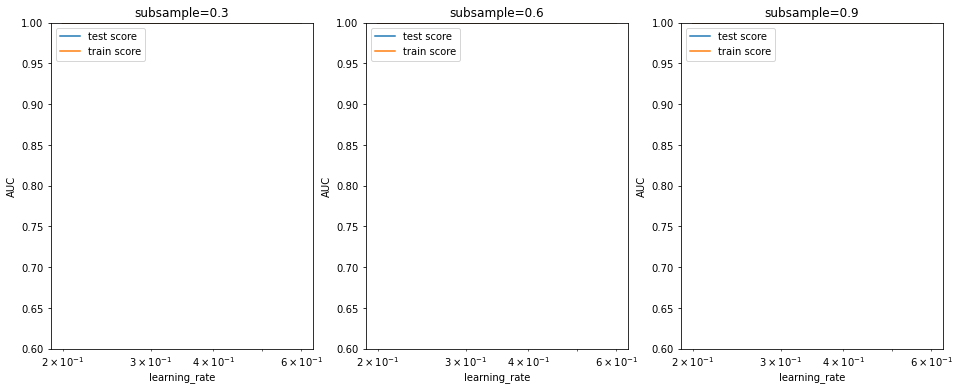

In [341]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [342]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [343]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

[20:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Prediction on the train set

In [344]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [345]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [346]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [347]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034099952
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [348]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [350]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

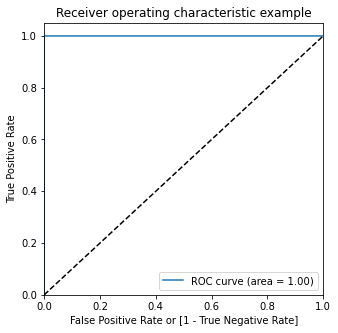

In [351]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

### Prediction on the test set

In [352]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [353]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56839    27]
 [   20    76]]


In [354]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [361]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9991748885221726
Sensitivity:- 0.7916666666666666
Specificity:- 0.9995251995920234


In [356]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.79      0.76        96

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [357]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [358]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9618437789423088

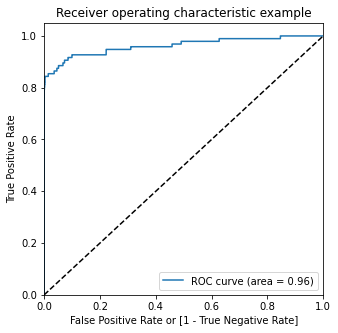

In [359]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model summary

# 3. Decision Tree

In [362]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [363]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.901433,0.013926,0.055947,0.003659,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985688,0.984839,0.985551,0.000535,5
1,6.587242,0.146290,0.048885,0.002834,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985688,0.984837,0.985551,0.000535,6
2,6.840893,0.031110,0.053100,0.003354,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986074,0.985640,0.984774,0.985496,0.000540,8
3,6.852713,0.061710,0.053851,0.001415,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986076,0.985640,0.984773,0.985496,0.000541,7
4,12.470957,0.007315,0.055059,0.007474,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998110,0.998119,0.998017,0.998082,0.000046,2
5,12.602450,0.085274,0.059845,0.002931,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998153,0.998132,0.997988,0.998091,0.000074,1
6,12.503156,0.127390,0.059763,0.008132,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998090,0.998032,0.997937,0.998020,0.000063,4
7,12.409395,0.270832,0.053036,0.008752,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998099,0.998083,0.997924,0.998036,0.000079,3


In [364]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980911440927245
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [365]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

### Prediction on the train set

In [366]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [368]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [367]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [369]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.7916666666666666
Specificity:- 0.9995251995920234


In [370]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [371]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [372]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

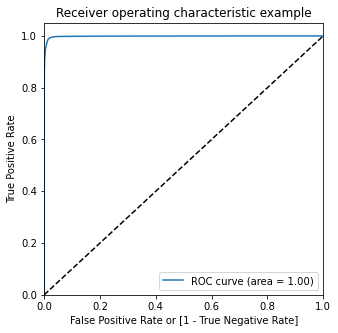

In [373]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

### Prediction on the test set

In [374]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [375]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [376]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [377]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [378]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [379]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [380]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

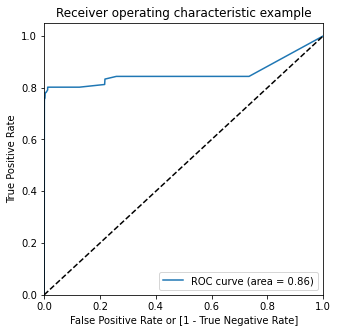

In [381]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Model summary